In [1]:
import pandas as pd
from scipy.stats import ttest_rel

In [2]:
file_path = 'report3.csv'  
data = pd.read_csv(file_path)

In [3]:
# Extract the mean values for both conditions
with_subs_means = data.iloc[2:13, -1].astype(float)  # Extracting the mean column for "WITH SUBSERVERS"
without_subs_means = data.iloc[20:31, -1].astype(float)  # Extracting the mean column for "WITHOUT SUBSERVERS"


In [4]:
t_stat, p_value = ttest_rel(with_subs_means, without_subs_means)

In [5]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.5132229284855935
P-value: 0.6189421371649625


In [6]:
# Interpret the results
alpha = 0.05  
if p_value < alpha:
    print("There is a statistically significant difference between the two conditions.")
else:
    print("There is no statistically significant difference between the two conditions.")

There is no statistically significant difference between the two conditions.


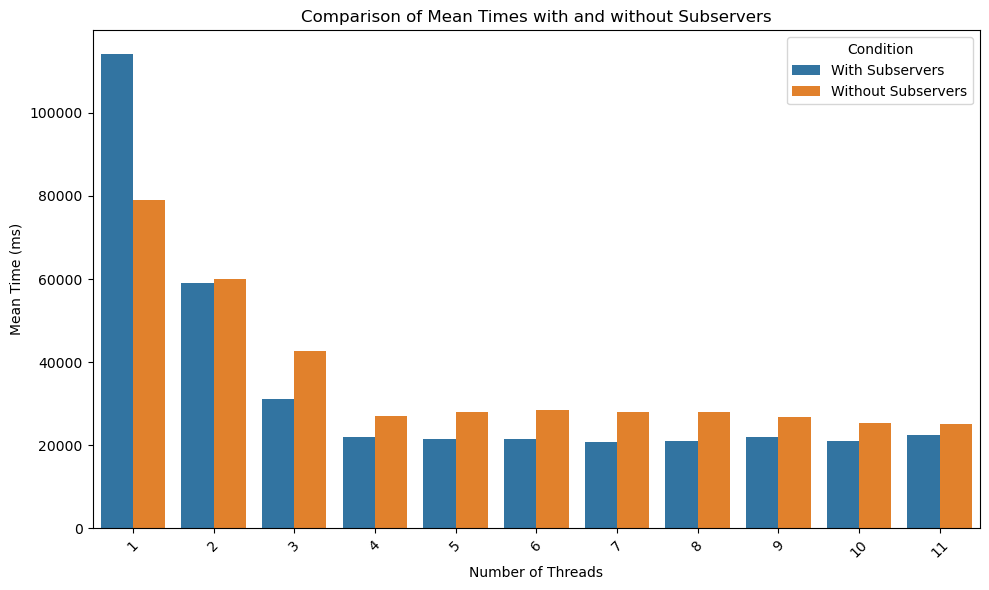

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'with_subs_means' and 'without_subs_means' are already defined from the previous step

# Create a DataFrame for visualization
threads = list(range(1, len(with_subs_means) + 1))  # Assuming thread counts are sequential integers
means_data = pd.DataFrame({
    'Threads': threads,
    'With Subservers': with_subs_means.values,
    'Without Subservers': without_subs_means.values
})

# Melt the DataFrame to long format for seaborn
means_melted = pd.melt(means_data, id_vars=['Threads'], value_vars=['With Subservers', 'Without Subservers'],
                       var_name='Condition', value_name='Mean Time (ms)')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=means_melted, x='Threads', y='Mean Time (ms)', hue='Condition')
plt.title('Comparison of Mean Times with and without Subservers')
plt.xlabel('Number of Threads')
plt.ylabel('Mean Time (ms)')
plt.legend(title='Condition')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()